# Machine Learning - Modelo de classificação - Diabetes

## Definição do Problema de Negócio

Modelo preditivo capaz de prever se uma pessoa irá desenvolver diabetes. Para treinar nosso modelo usaremos dados históricos de pacientes, disponíveis no dataset abaixo.

Dataset: Pima Indians Diabetes Data Set http://archive.ics.uci.edu/ml/datasets/diabetes

Este dataset descreve os registros médicos entre pacientes do Pima Inidians e cada registro está marcado se o paciente desenvolveu ou não diabetes. 

### Informações sobre os atributos que usaremos em nosso modelo:

1 (preg). Number of times pregnant

2 (plas). Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3 (pres). Diastolic blood pressure (mm Hg) 

4 (skin). Triceps skin fold thickness (mm)

5 (test). 2-Hour serum insulin (mu U/ml) 

6 (mass). Body mass index (weight in kg/(height in m)^2) 

7 (pedi). Diabetes pedigree function 

8 (age). Age (years) 

9 (class). Class variable (0 or 1)

# Pré-Processamento

### Extraindo e carregando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # Evita avisos desnecessários para a apresentação ficar limpa

In [2]:
dados = pd.read_csv('data/pima-data.csv',
                    names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])

In [3]:
dados.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Bad_rate


Bad_rate (razão entre quantidade de 1 no class e o total (0 e 1) de valores no target (class): 0.35


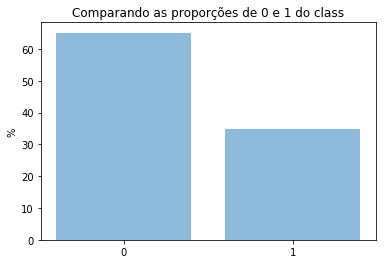

In [4]:
bad_rate = dados['class'].value_counts()[1]/(dados['class'].value_counts()[0]+dados['class'].value_counts()[1])
print(f'\nBad_rate (razão entre quantidade de 1 no class e o total (0 e 1) de valores no target (class): {bad_rate:.2f}')

p0 = (dados['class'].value_counts()[0]/(dados['class'].value_counts()[0]+dados['class'].value_counts()[1]))*100
p1 = bad_rate*100
objects = ('0', '1')
y_pos = [0,1]
performance = [p0,p1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('%')
plt.title('Comparando as proporções de 0 e 1 do class')
plt.show()

### Correlação de Pearson


Correlação de Pearson:


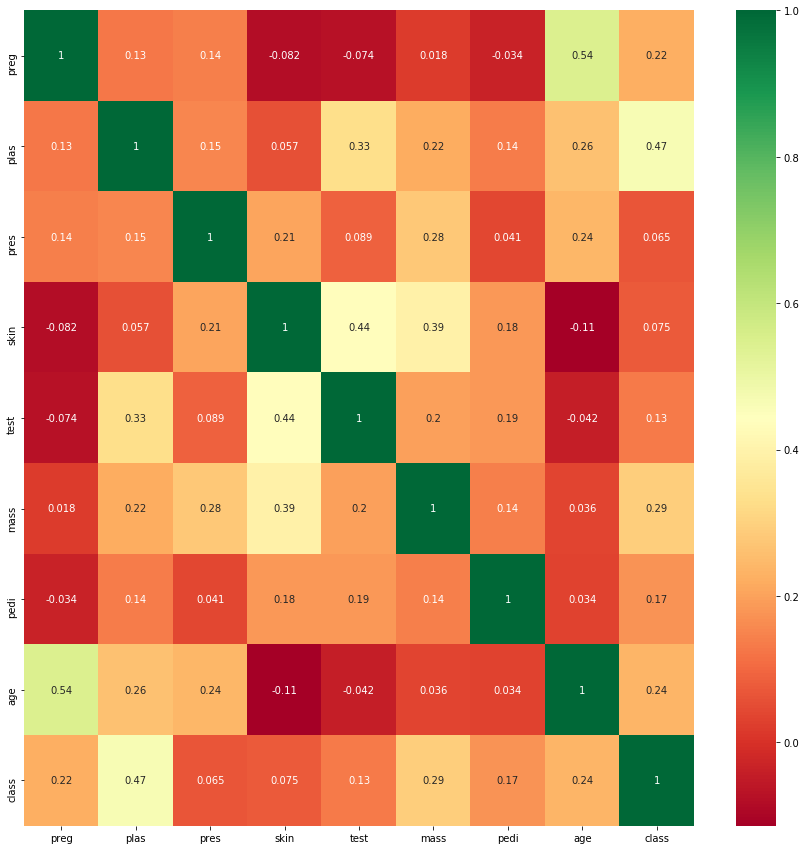

In [5]:
print('\nCorrelação de Pearson:')
plt.figure(figsize=(15,15))
g = sns.heatmap(dados.corr(),annot=True,cmap="RdYlGn")

### Box plot

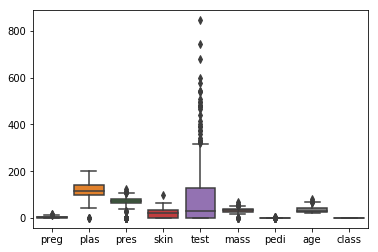

In [6]:
sns.boxplot(data=dados, orient = 'v')


Plot da feature preg


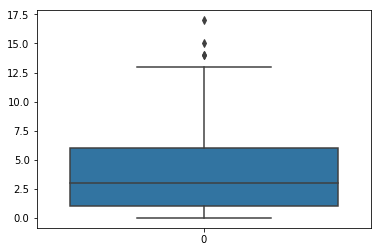


Plot da feature plas


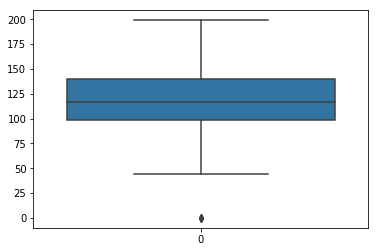


Plot da feature pres


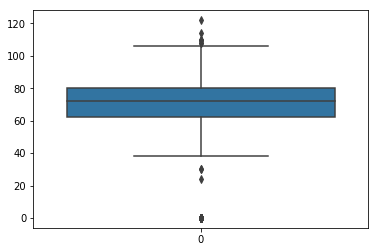


Plot da feature skin


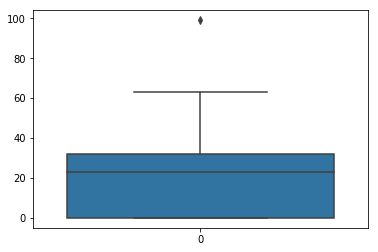


Plot da feature test


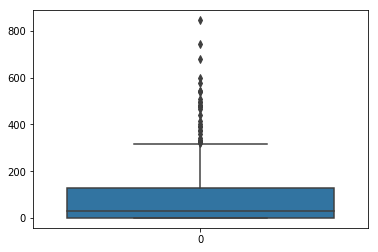


Plot da feature mass


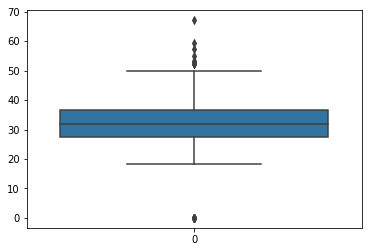


Plot da feature pedi


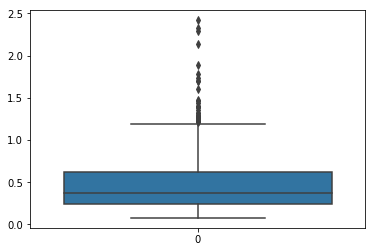


Plot da feature age


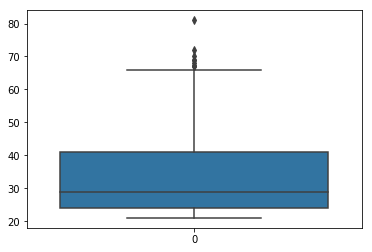


Plot da feature class


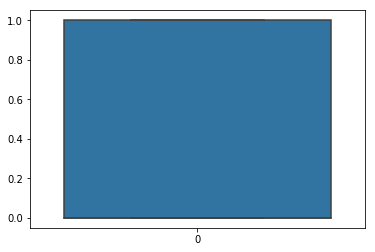

In [7]:
for feature in dados.columns:
    sns.boxplot(data=dados[feature], orient = 'v')
    print(f'\nPlot da feature {feature}')
    plt.show()

### Definindo treino e alvo

In [8]:
train = dados.copy()
y = train['class']
train = train.drop('class', axis=1)

### Escala

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)

train_scaled = pd.DataFrame(scaler.transform(train), columns = train.columns)
train_scaled.index = train.index

### Feature Selection

#### Método Ensemble para Seleção de Variáveis

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

modeloEnsemble = ExtraTreesClassifier()
modeloEnsemble.fit(train_scaled,y)

# Resultados
pd.DataFrame([modeloEnsemble.feature_importances_], columns = train_scaled.columns).rename(index={0:'feature_importances'})

,preg,plas,pres,skin,test,mass,pedi,age
feature_importances,0.109828,0.218068,0.093328,0.077353,0.071704,0.154302,0.116918,0.158499


In [11]:
# vamos dropar a feature de menor importância
abt_train = train_scaled.drop('test', axis=1)

# Seleção do modelo preditivo

nome: média dos resultados, desvio padrão dos resultados
LR: 82.6712115875732, 4.2098638945575315
LDA: 82.96584348624762, 4.392652563047189
NB: 82.67378961776407, 4.3000266673588365
KNN: 77.00332999161544, 5.294121119605844
CART: 66.4944976461332, 5.3378674921626414
SVM: 82.81109382956767, 4.516947365617882
RF: 80.90103479352761, 5.982732506395727
GB: 82.48270783251729, 5.9844556488506875


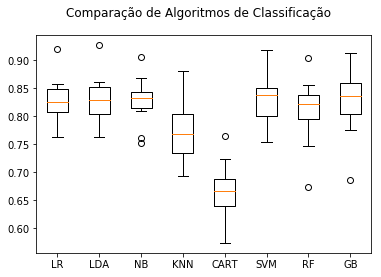

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Definindo os valores para o número de folds
num_folds = 10
seed = 42

# Preparando a lista de modelos

modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('RF', RandomForestClassifier(n_estimators=20, 
                            max_depth=2)))
modelos.append(('GB', GradientBoostingClassifier(n_estimators=20, 
                            max_depth=2)))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

print('nome: média dos resultados, desvio padrão dos resultados')
for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, abt_train, y, cv = kfold, scoring = 'roc_auc')
    resultados.append(cv_results)
    nomes.append(nome)
    print(f'{nome}: {cv_results.mean()*100}, {cv_results.std()*100}')

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

## Selecionando melhor modelo

### Verificando se há algum modelo overfitado entre as melhores opções

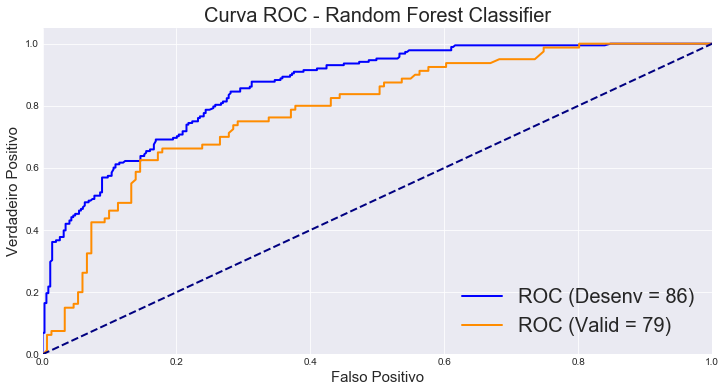

Base de Desenv
Acurácia: 77.47, Gini: 73.0 e Área Curva ROC: 86.3

Base de Valid
Acurácia: 74.03, Gini: 57.99999999999999 e Área Curva ROC: 78.83




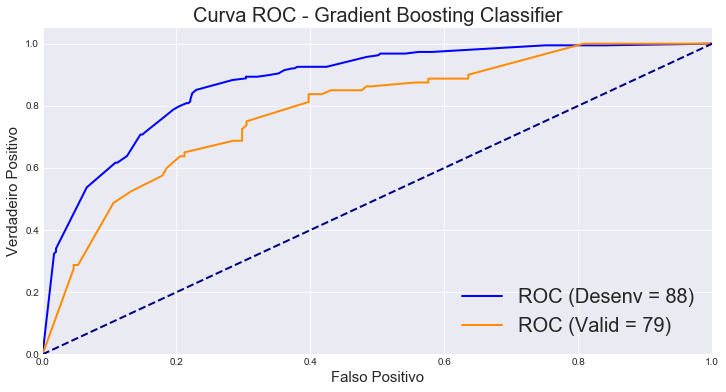

Base de Desenv
Acurácia: 75.61, Gini: 75.0 e Área Curva ROC: 87.75

Base de Valid
Acurácia: 71.86, Gini: 56.99999999999999 e Área Curva ROC: 78.53




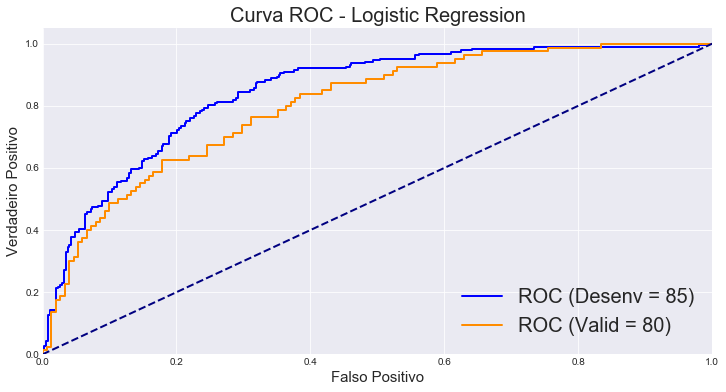

Base de Desenv
Acurácia: 76.16, Gini: 69.0 e Área Curva ROC: 84.68

Base de Valid
Acurácia: 74.89, Gini: 60.0 e Área Curva ROC: 80.13




In [13]:
RF = RandomForestClassifier(n_estimators=20, 
                            max_depth=2, 
                            random_state = 42)

GB = GradientBoostingClassifier(n_estimators=10, 
                            max_depth=2, 
                            random_state = 42)

LR = LogisticRegression(random_state = 42)


from sklearn.model_selection import train_test_split
X_desenv, X_valid, y_desenv, y_valid = train_test_split(abt_train, y, train_size = 0.7, test_size = 0.3, random_state = 42)

RF.fit(X_desenv, y_desenv)
GB.fit(X_desenv, y_desenv)
LR.fit(X_desenv, y_desenv)

def roccurve(y_desenv,y_pred_desenv,y_score_desenv,y_valid,y_pred_valid,y_score_valid,titulo=""):
    '''
    Devolve gráfico de curva roc e 3 scores: acurácia, gini e área curva ROC.
    '''
    # 1) Cálculo da acurácia
    from sklearn.metrics import accuracy_score

    # Desenvolvimento (desenv)
    acc_desenv = round(accuracy_score(y_pred_desenv, y_desenv) * 100, 2)

    #validação (valid)
    acc_valid = round(accuracy_score(y_pred_valid, y_valid) * 100, 2)

    # 2) Cálculo da área sob curva ROC e Gini
    from sklearn.metrics import roc_curve, auc

    # Treino
    fpr_desenv, tpr_desenv, thresholds = roc_curve(y_desenv, y_score_desenv)
    roc_auc_desenv = round(100*auc(fpr_desenv, tpr_desenv),2)
    gini_desenv = 100*round((2*roc_auc_desenv/100 - 1), 2)

    # valide
    fpr_valid, tpr_valid, thresholds = roc_curve(y_valid, y_score_valid)
    roc_auc_valid = round(100*auc(fpr_valid, tpr_valid),2)
    gini_valid = 100*round((2*roc_auc_valid/100 - 1), 2)


    # 3) Gráfico da curva ROC
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(12,6))

    lw = 2

    plt.plot(fpr_desenv, tpr_desenv, color='blue',lw=lw, label='ROC (Desenv = %0.0f)' % roc_auc_desenv)
    plt.plot(fpr_valid, tpr_valid, color='darkorange',lw=lw, label='ROC (Valid = %0.0f)' % roc_auc_valid)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Falso Positivo', fontsize=15)
    plt.ylabel('Verdadeiro Positivo', fontsize=15)
    plt.legend(loc="lower right")
    plt.legend(fontsize=20) 
    plt.title(titulo, fontsize=20)
    plt.show()
    
    print(f'Base de Desenv\nAcurácia: {acc_desenv}, Gini: {gini_desenv} e Área Curva ROC: {roc_auc_desenv}')
    print(f'\nBase de Valid\nAcurácia: {acc_valid}, Gini: {gini_valid} e Área Curva ROC: {roc_auc_valid}\n\n')
    

lista = [RF, GB, LR]
lista_nome = ['Random Forest Classifier', 'Gradient Boosting Classifier', 'Logistic Regression']
n=0
for i in lista:
    model = i
    y_pred_desenv = model.predict(X_desenv)
    y_score_desenv = model.predict_proba(X_desenv)[:,1]
    
    y_pred_valid = model.predict(X_valid)
    y_score_valid = model.predict_proba(X_valid)[:,1]
    
    titulo = f"Curva ROC - {lista_nome[n]}"
    n += 1

    roccurve(y_desenv,y_pred_desenv,y_score_desenv,y_valid,y_pred_valid,y_score_valid,titulo)

### Melhor modelo: LR

# Tunando o melhor modelo

In [14]:
# Import dos módulos
from sklearn.model_selection import GridSearchCV

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o grid
grid = GridSearchCV(estimator = LogisticRegression() , param_grid = valores_grid, scoring='roc_auc')

grid.fit(abt_train, y)

# Print do resultado
print(f'ROC_AUC: {grid.best_score_ * 100}')
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

ROC_AUC: 83.25105896441552
Melhores Parâmetros do Modelo:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [15]:
print (pd.crosstab(y_valid, grid.predict(X_valid), rownames=['Real'], colnames=['Predito'],margins=True))

Predito    0   1  All
Real                 
0        130  21  151
1         29  51   80
All      159  72  231


In [16]:
LR_final = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Validação do modelo

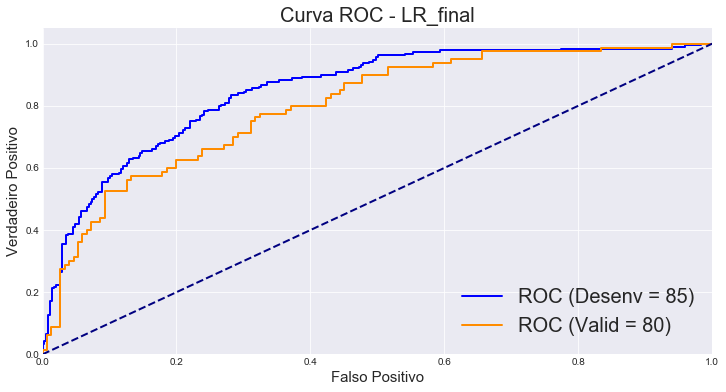

Base de Desenv
Acurácia: 78.03, Gini: 70.0 e Área Curva ROC: 84.88

Base de Valid
Acurácia: 74.03, Gini: 60.0 e Área Curva ROC: 79.8




In [17]:
LR_final.fit(X_desenv,y_desenv)

y_pred_desenv = LR_final.predict(X_desenv)
y_score_desenv = LR_final.predict_proba(X_desenv)[:,1]
    
y_pred_valid = LR_final.predict(X_valid)
y_score_valid = LR_final.predict_proba(X_valid)[:,1]
   
titulo = f"Curva ROC - LR_final"

roccurve(y_desenv,y_pred_desenv,y_score_desenv,y_valid,y_pred_valid,y_score_valid,titulo)

# Salvando e carregando o modelo

In [18]:
# Salvando o resultado do trabalho
import pickle

arquivo = 'modelos/modelo_classificador_final.sav'
pickle.dump(LR_final, open(arquivo, 'wb'))
print("Modelo salvo!")

# Carregando o arquivo
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.score(X_valid, y_valid)
print("Modelo carregado!")

Modelo salvo!
Modelo carregado!
